In [1]:
from scipy.optimize import curve_fit
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
class Car:
    "sdfsf"

T=5000
l=500 #總長
P=[] #所有時間所有狀態


t=[] #時間(長度和P一樣)



p2=1 #進車機率
def f(l):
    return l[0]
#排序用的function 可不管
def prob(x):
    a=random.randint(1,10)
    if a<=x*10:
        return True
    else:
        return False
    # x的機率是true 1-x的機率是False
def ini(n,V_max):
    
    S=[] #儲存某個時間點個個車子的狀態
    rad_x=random.sample(range(l),n)
    for i in range(n):
        x=Car()
        x.pos=rad_x[i]
        x.v=random.randint(0,V_max)
        
        S.append([x.pos,x.v])
    S.sort(key=f)

    return S
   #初始化
def avg(x):
    
    for i in range(len(x)):
        if i==0:
            pass
        else:
            x[i]+=x[i-1]
    return x[len(x)-1]/len(x)
    



In [2]:

rho=[] #各個時刻的密度
t_rho=[] #用來化密度-t圖的
avgV=[] #個個時刻的平均速度
def traffic(n,V_max,p):
    #n是車子數量 V_max速度上限 p減速機率
    S=ini(n,V_max)
    V=[] #計算平均速度用的

    for j in range(T):
        rho.append(len(S)/l)
        t_rho.append(j)
        V1=[]
        #每個時段內發生的事
        for i in range(len(S)):
            x=len(S)-1
            t.append(j) 
            P.append(S[x-i][0])
        #每台車的狀況
            if i>0  :
                   #(1)加速不會撞到的話就+速
                if S[x-i][1]+1 <(S[x-i+1][0]-S[x-i][0]) and S[x-i][1]<V_max :
                    S[x-i][1]+=1
                    if prob(p)==True :
                        S[x-i][1]-=1
                         #(3)p機率減速1單位
                if S[x-i][1]>=(S[x-i+1][0]-S[x-i][0])  :
                    #(2)速度會撞上前車的話就減速至跟距離一樣的大小避免相撞
                    S[x-i][1]=S[x-i+1][0]-S[x-i][0]-1
                    if S[x-i][1]<0:
                            #debug用的
                        print(S[x-i+1][0],S[x-i][0],S[x-i][1],j,i)
                        break
            if i==0 and S[x-i][1]<V_max:
                S[x-i][1]+=1
                if prob(p)==True :
                    S[x-i][1]-=1
                
           
            
           
        for k in range(len(S)):
            S[k][0]+=S[k][1]  #(4)更新車子的位置
            if S[k][1]>V_max:
                print(87)
                break
            V.append(S[k][1]) #j時刻所有車的速度都丟進來
            V1.append(S[k][1])
        avgV.append(avg(V1)) #j時刻的平均速度
      
            
        if len(S)!=0 and S[len(S)-1][0]>l:
            S.remove(S[len(S)-1])
            for k in range(len(S)):
                S[k][0]+=1
            S.insert(0,[0,random.randint(0,V_max)])
                
         
    
    avg_V=avg(V) #每個n對應到的平均速度
    
    return avg_V 
P=[]
t=[]
traffic(100,5,0.5)


1.99606

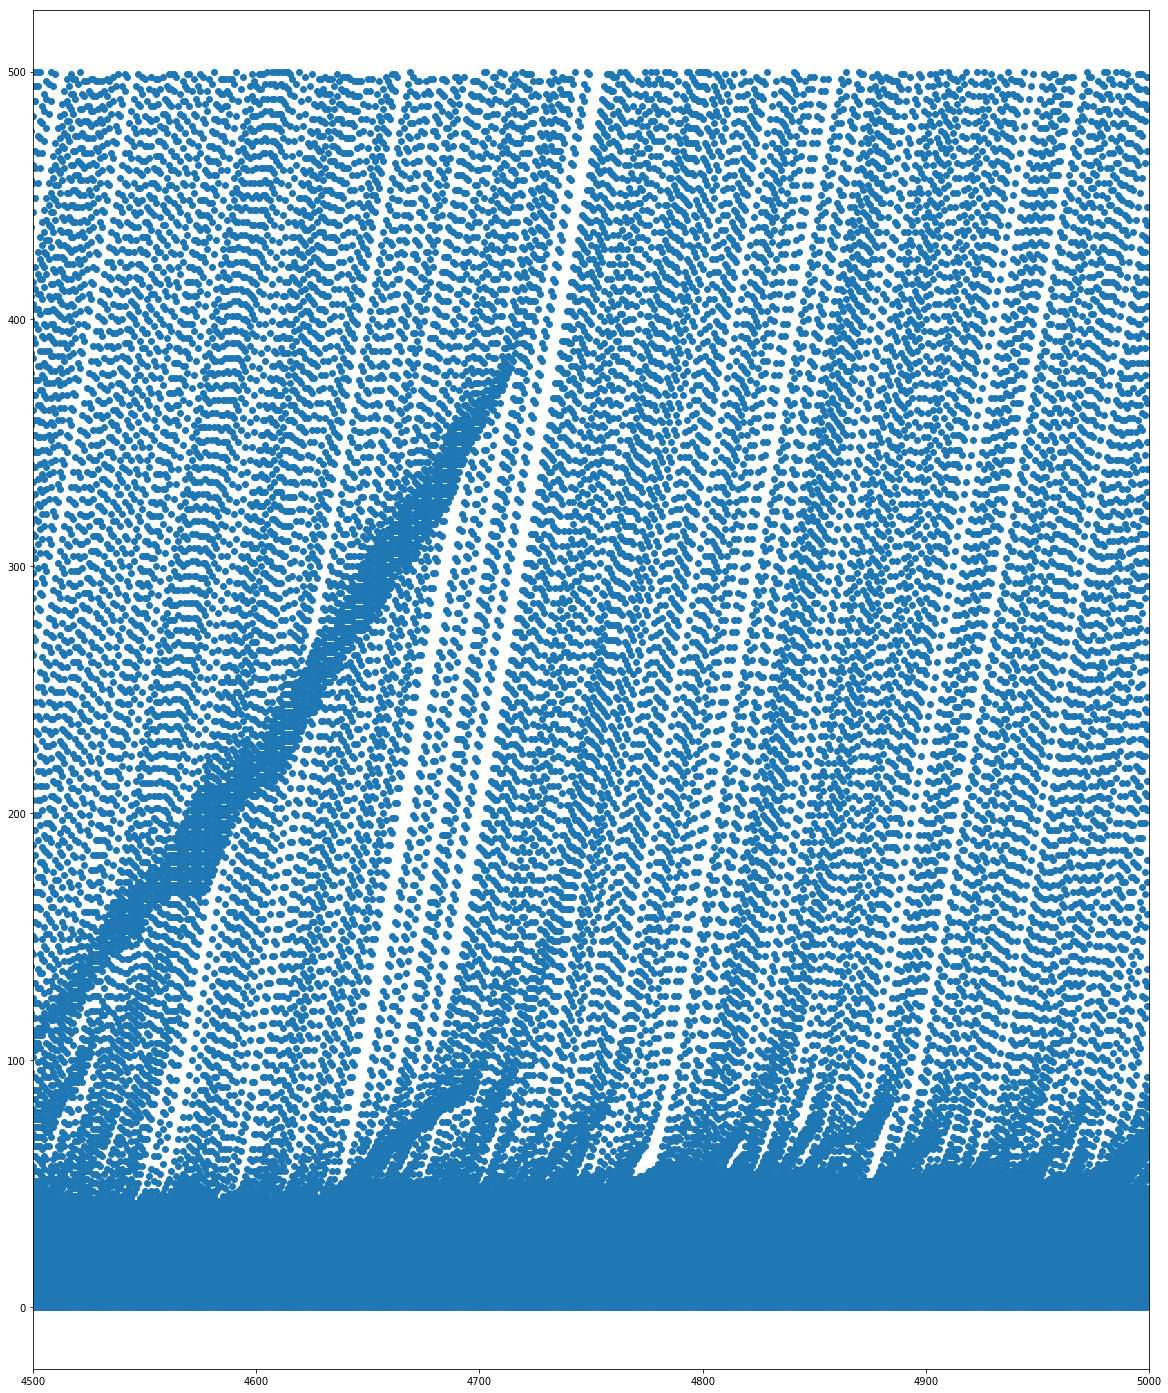

In [13]:
plt.figure(figsize=(20,25))
plt.xlim(4500,5000)
#plt.ylim(0,2)
#plt.plot(t_rho,avgV)
#plt.plot(t_rho,rho)
plt.scatter(t,P) #X 時間    Y 位置

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491


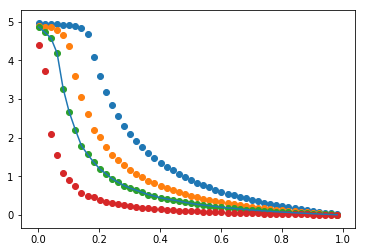

In [3]:
#Vbar 和 ro
Vbar1=[] #蒐集各個n的平均速度
ro1=[] #密度

for i in range(1,500,10):
    Vbar1.append(traffic(i,5,0.1))
    ro1.append(i/500)
    print(i)


Vbar2=[] #蒐集各個n的平均速度
ro2=[] #密度

for i in range(1,500,10):
    Vbar2.append(traffic(i,5,0.5))
    ro2.append(i/500)
    print(i)


Vbar3=[] #蒐集各個n的平均速度
ro3=[] #密度

for i in range(1,500,10):
    Vbar3.append(traffic(i,5,0.7))
    ro3.append(i/500)
    print(i)
plt.plot(ro3,Vbar3)

Vbar4=[] #蒐集各個n的平均速度
ro4=[] #密度

for i in range(1,500,10):
    Vbar4.append(traffic(i,5,0.9))
    ro4.append(i/500)
    print(i)
plt.scatter(ro1,Vbar1)
plt.scatter(ro2,Vbar2)
plt.scatter(ro3,Vbar3)
plt.scatter(ro4,Vbar4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


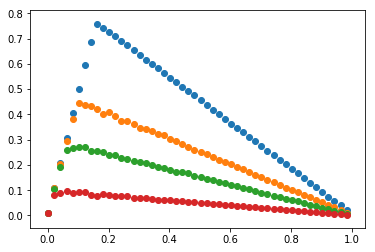

In [16]:
q1=[]
for i in range(len(Vbar1)):
    q1.append(Vbar1[i]*ro1[i])
    print(i)
q2=[]
for i in range(len(Vbar2)):
    q2.append(Vbar2[i]*ro2[i])
    
q3=[]
for i in range(len(Vbar3)):
    q3.append(Vbar3[i]*ro3[i])
q4=[]
for i in range(len(Vbar4)):
    q4.append(Vbar4[i]*ro4[i])
plt.scatter(ro1,q1)
plt.scatter(ro2,q2)
plt.scatter(ro3,q3)
plt.scatter(ro4,q4)

In [68]:
def func(ro,a,b,c,d):
    return (a*(b-ro)/ro+c)+d

ad=[ro1[i] for i in range(84,499)]
ro11=np.array(ad)
V1=np.array([Vbar1[i] for i in range(84,499)])
    
#y1=[]
#for i in range(84,500):
 #   q=i/500
  #  y1.append([(1-q)/q])
   # print(i)


In [79]:
qaq,qpq=curve_fit(func,ro11,V1)

In [80]:
a=qaq[0]
b=qaq[1]
c=qaq[2]
d=qaq[3]

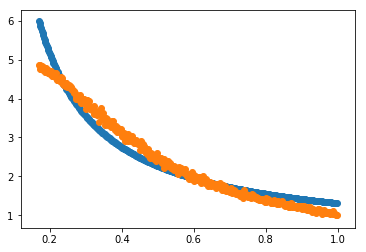

In [87]:
plt.scatter(ro11,[func(i,a,b,c,d) for i in ro11])
plt.scatter(ro11,V1)

In [142]:
a=[(4,2),(5,3)]
a.insert(0,[4,5])
a


[[4, 5], (4, 2), (5, 3)]

877 1250
